In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the merged and cleaned calendar data
calendar_data = pd.read_csv(r"C:\Users\matth\OneDrive\Documents\KU Leuven\Thesis\Merged_Data\paris_merged_calendar.csv")

# Quick check of the data
print("Dataset shape:", calendar_data.shape)
print("\nColumns:", calendar_data.columns.tolist())
print("\nFirst few rows:")
print(calendar_data.head())
print("\nBasic statistics:")
print(calendar_data.describe())

Dataset shape: (79418789, 3)

Columns: ['listing_id', 'date', 'price']

First few rows:
   listing_id        date  price
0        3109  2023-09-05  110.0
1        3109  2023-09-06  110.0
2        3109  2023-09-07  110.0
3        3109  2023-09-08  110.0
4        3109  2023-09-09  110.0

Basic statistics:
         listing_id         price
count  7.941879e+07  7.941861e+07
mean   5.330391e+17  2.818720e+02
std    4.859655e+17  2.704009e+03
min    3.109000e+03  0.000000e+00
25%    2.902470e+07  9.000000e+01
50%    6.774283e+17  1.400000e+02
75%    9.957272e+17  2.500000e+02
max    1.239137e+18  9.016840e+05


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the listings data
listings_data = pd.read_csv(r"C:\Users\matth\OneDrive\Documents\KU Leuven\Thesis\Data_Mor\paris\2024-09-06\listings.csv")

# Quick check of the data
print("Dataset shape:", listings_data.shape)
print("\nColumns:", listings_data.columns.tolist())
print("\nFirst few rows:")
print(listings_data.head())
print("\nBasic statistics:")
print(listings_data.describe())

Dataset shape: (95461, 75)

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availabili

In [70]:
# Select relevant columns from listings DataFrame
listings_cleaned = listings_data[['id', 'neighbourhood_cleansed', 'latitude', 'longitude']]

# Verify the structures
print("Listings shape:", listings_cleaned.shape)
print("\nListings columns:", listings_cleaned.columns.tolist())

Listings shape: (95461, 4)

Listings columns: ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']


In [71]:
def load_and_prepare_data(calendar_path, listings_path, n_listings=500):
    """Load and prepare the data with basic cleaning and sampling."""
    # Load listings first to get the sample
    listings_df = pd.read_csv(listings_path)
    
    # Randomly sample n_listings
    sampled_listings = listings_df['id'].sample(n=n_listings, random_state=42)
    
    # Clean and prepare listings data
    listings_cleaned = listings_df[listings_df['id'].isin(sampled_listings)][
        ['id', 'neighbourhood_cleansed', 'latitude', 'longitude']
    ]
    listings_cleaned = listings_cleaned.rename(columns={'id': 'listing_id'})
    
    # Load calendar data
    calendar_df = pd.read_csv(calendar_path)
    
    # Filter calendar data for sampled listings
    calendar_df = calendar_df[calendar_df['listing_id'].isin(sampled_listings)]
    
    # Merge calendar with listings data
    df = pd.merge(calendar_df, listings_cleaned, on='listing_id', how='left')
    df['date'] = pd.to_datetime(df['date'])
    
    print(f"Total listings in sample: {len(df['listing_id'].unique())}")
    print(f"Total records in sample: {len(df)}")
    
    return df

In [72]:
# Call the function with your file paths
calendar_path = r"C:\Users\matth\OneDrive\Documents\KU Leuven\Thesis\Merged_Data\paris_merged_calendar.csv"
listings_path = r"C:\Users\matth\OneDrive\Documents\KU Leuven\Thesis\Data_Mor\paris\2024-09-06\listings.csv"

# Load and prepare the data
df = load_and_prepare_data(calendar_path, listings_path, n_listings=500)

Total listings in sample: 500
Total records in sample: 332673


In [73]:
print(df)

                 listing_id       date   price neighbourhood_cleansed  \
0                     25450 2024-03-18   320.0               Entrepôt   
1                     25450 2024-03-19   320.0               Entrepôt   
2                     25450 2024-03-20   320.0               Entrepôt   
3                     25450 2024-03-21   320.0               Entrepôt   
4                     25450 2024-03-22   320.0               Entrepôt   
...                     ...        ...     ...                    ...   
332668  1235588205340106663 2025-09-06  6000.0                  Passy   
332669  1235588205340106663 2025-09-07  6000.0                  Passy   
332670  1235588205340106663 2025-09-08  6000.0                  Passy   
332671  1235588205340106663 2025-09-09  6000.0                  Passy   
332672  1235588205340106663 2025-09-10  6000.0                  Passy   

         latitude  longitude  
0       48.870070   2.364420  
1       48.870070   2.364420  
2       48.870070   2.364420  

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime

class ParisDataPreparation:
    def __init__(self):
        self.scaler = StandardScaler()        
    
    def clean_price(self, df, price_column='price'):
        """Clean price values"""
        # Remove currency symbols and convert to float
        df[price_column] = df[price_column].replace('[\$,€,£]', '', regex=True)
        df[price_column] = df[price_column].astype(str).str.replace(',', '')
        df[price_column] = pd.to_numeric(df[price_column], errors='coerce')
        return df
    
    def handle_missing_values(self, df):
        """Handle missing values for key columns"""
        # For numerical columns
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            df[col] = df[col].fillna(df[col].median())
        
        # For categorical columns
        categorical_columns = df.select_dtypes(include=['object']).columns
        for col in categorical_columns:
            df[col] = df[col].fillna(df[col].mode()[0])
            
        return df
    
    def clean_coordinates(self, df):
        """Clean and validate coordinates for Paris"""
        # Paris coordinate bounds
        PARIS_LAT_MIN, PARIS_LAT_MAX = 48.8, 48.9
        PARIS_LON_MIN, PARIS_LON_MAX = 2.2, 2.5
        
        # Filter invalid coordinates
        mask = (
            (df['latitude'] >= PARIS_LAT_MIN) & 
            (df['latitude'] <= PARIS_LAT_MAX) &
            (df['longitude'] >= PARIS_LON_MIN) & 
            (df['longitude'] <= PARIS_LON_MAX)
        )
        return df[mask]
    
    def handle_outliers(self, df, column='price', method='iqr'):
        """Remove outliers using IQR method"""
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    def prepare_date_features(self, df):
        """Create date-related features"""
        df['date'] = pd.to_datetime(df['date'])
        df['day_of_week'] = df['date'].dt.dayofweek
        df['month'] = df['date'].dt.month
        df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
        
        # Paris high season (summer months and December)
        df['is_high_season'] = df['month'].isin([6, 7, 8, 12]).astype(int)
        
        return df
    
    def prepare_basic_features(self, df):
        """Prepare basic features for baseline model"""
        basic_features = [
            'listing_id',
            'date',
            'price',
            'latitude',
            'longitude',
            'neighbourhood_cleansed' 
        ]
        return df[basic_features]
    
    def prepare_advanced_features(self, df):
        """Add advanced features"""
        df = df.copy()
        
        # Calculate distance to center (Chatelet as Paris center)
        PARIS_CENTER_LAT = 48.8589
        PARIS_CENTER_LON = 2.3469
        df['distance_to_center'] = np.sqrt(
            (df['latitude'] - PARIS_CENTER_LAT)**2 + 
            (df['longitude'] - PARIS_CENTER_LON)**2
        )
        
        # Add temporal features
        df = self.prepare_date_features(df)
        
        # Add neighborhood statistics
        neighborhood_stats = df.groupby('neighbourhood_cleansed')['price'].agg(
            ['mean', 'std']
        ).reset_index()
        df = df.merge(
            neighborhood_stats, 
            on='neighbourhood_cleansed', 
            how='left',
            suffixes=('', '_neighborhood_avg')
        )
        
        return df
    
    def scale_features(self, df, columns_to_scale):
        """Scale numerical features"""
        df[columns_to_scale] = self.scaler.fit_transform(df[columns_to_scale])
        return df
    
    def prepare_data(self, df, advanced=False):
        """Main preparation pipeline"""
        # Make a copy to avoid modifying original
        df = df.copy()
        
        # Basic cleaning
        df = self.clean_price(df)
        df = self.handle_missing_values(df)
        df = self.handle_outliers(df)
        df = self.prepare_date_features(df)
        
        if not advanced:
            # Prepare basic features for baseline
            df = self.prepare_basic_features(df)
        else:
            # Prepare advanced features
            df = self.prepare_advanced_features(df)
        
        # Scale numerical features (except listing_id and date)
        numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
        numerical_columns = numerical_columns[~numerical_columns.isin(['listing_id'])]
        df = self.scale_features(df, numerical_columns)
        
        return df


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
C:\Users\matth\AppData\Local\Temp\ipykernel_15652\2843440462.py:13: SyntaxWarning: invalid escape sequence '\$'
  df[price_column] = df[price_column].replace('[\$,€,£]', '', regex=True)


In [75]:
# First, import required libraries and create the preprocessor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize the preprocessor
preprocessor = ParisDataPreparation()

# Let's first look at the data before preparation
print("Original DataFrame shape:", df.shape)
print("\nOriginal DataFrame columns:", df.columns.tolist())
print("\nMissing values before preparation:\n", df.isnull().sum())

# Now apply the preparation for both baseline and advanced
baseline_data = preprocessor.prepare_data(df, advanced=False)
advanced_data = preprocessor.prepare_data(df, advanced=True)

# Check the results
print("\nBaseline DataFrame shape:", baseline_data.shape)
print("Advanced DataFrame shape:", advanced_data.shape)

# Look at the first few rows of each
print("\nBaseline features:\n", baseline_data.columns.tolist())
print("\nAdvanced features:\n", advanced_data.columns.tolist())

Original DataFrame shape: (332673, 6)

Original DataFrame columns: ['listing_id', 'date', 'price', 'neighbourhood_cleansed', 'latitude', 'longitude']

Missing values before preparation:
 listing_id                0
date                      0
price                     0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
dtype: int64

Baseline DataFrame shape: (302251, 6)
Advanced DataFrame shape: (302251, 13)

Baseline features:
 ['listing_id', 'date', 'price', 'latitude', 'longitude', 'neighbourhood_cleansed']

Advanced features:
 ['listing_id', 'date', 'price', 'neighbourhood_cleansed', 'latitude', 'longitude', 'day_of_week', 'month', 'is_weekend', 'is_high_season', 'distance_to_center', 'mean', 'std']


In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def analyze_price_variation(df):
    """Analyze price variation per listing to identify suitable listings"""
    price_stats = df.groupby('listing_id')['price'].agg([
        'count',
        'nunique',
        'mean',
        'std'
    ]).reset_index()
    
    price_stats['price_variation'] = price_stats['nunique'] / price_stats['count']
    
    print(f"Total listings: {len(price_stats)}")
    print(f"Listings with >1 price: {len(price_stats[price_stats['nunique'] > 1])}")
    print("\nPrice variation statistics:")
    print(price_stats['price_variation'].describe())
    
    return price_stats

def check_seasonality(listing_data):
    """Check for seasonality in price data"""
    try:
        # Resample to daily frequency if needed
        daily_prices = listing_data.set_index('date')['price'].resample('D').mean()
        decomposition = seasonal_decompose(daily_prices, period=7)  # Weekly seasonality
        
        return {
            'trend': decomposition.trend,
            'seasonal': decomposition.seasonal,
            'resid': decomposition.resid
        }
    except:
        return None

def fit_sarima_for_listing(listing_data, order=(1,1,1), seasonal_order=(1,1,1,7)):
    """Fit SARIMA model for a single listing"""
    # Prepare data
    n = len(listing_data)
    train_size = int(n * 0.8)
    train = listing_data['price'].iloc[:train_size]
    test = listing_data['price'].iloc[train_size:]
    
    try:
        # Use SARIMA if we detect seasonality
        model = ARIMA(train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        
        metrics = {
            'rmse': np.sqrt(mean_squared_error(test, predictions)),
            'mae': mean_absolute_error(test, predictions),
            'r2': r2_score(test, predictions),
            'predictions': predictions,
            'actual': test
        }
        
        return metrics
    except:
        return None

def evaluate_model_performance(df):
    """Evaluate model performance across all suitable listings"""
    # First analyze price variation
    price_stats = analyze_price_variation(df)
    
    # Filter for listings with sufficient variation
    suitable_listings = price_stats[
        (price_stats['nunique'] > 1) & 
        (price_stats['count'] > 30)
    ]['listing_id']
    
    results = {
        'rmse_scores': [],
        'mae_scores': [],
        'r2_scores': [],
        'predictions': [],
        'actuals': []
    }
    
    for listing_id in suitable_listings:
        listing_data = df[df['listing_id'] == listing_id].sort_values('date')
        
        # Check for seasonality
        seasonality = check_seasonality(listing_data)
        
        # Fit model with or without seasonal component
        if seasonality and np.any(seasonality['seasonal'] != 0):
            metrics = fit_sarima_for_listing(listing_data)
        else:
            metrics = fit_sarima_for_listing(listing_data, seasonal_order=None)
        
        if metrics:
            results['rmse_scores'].append(metrics['rmse'])
            results['mae_scores'].append(metrics['mae'])
            results['r2_scores'].append(metrics['r2'])
            results['predictions'].extend(metrics['predictions'])
            results['actuals'].extend(metrics['actual'])
    
    # Calculate overall metrics
    overall_metrics = {
        'avg_rmse': np.mean(results['rmse_scores']),
        'avg_mae': np.mean(results['mae_scores']),
        'avg_r2': np.mean(results['r2_scores']),
        'overall_r2': r2_score(results['actuals'], results['predictions'])
    }
    
    return overall_metrics, results

# Usage
# Load your data first
# calendar_data = pd.read_csv('path_to_calendar.csv')
# listings_data = pd.read_csv('path_to_listings.csv')

# Run analysis
metrics, detailed_results = evaluate_model_performance(baseline_data)

Total listings: 468
Listings with >1 price: 210

Price variation statistics:
count    468.000000
mean       0.009022
std        0.033759
min        0.001206
25%        0.001845
50%        0.002433
75%        0.003724
max        0.500000
Name: price_variation, dtype: float64


c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib

c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Total listings: 468
Listings with >1 price: 210

Price variation statistics:
count    468.000000
mean       0.009022
std        0.033759
min        0.001206
25%        0.001845
50%        0.002433
75%        0.003724
max        0.500000
Name: price_variation, dtype: float64


c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\matth\anaconda3\envs\Spatiotemporal_Analytics\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarn


Overall Model Performance:
--------------------------------------------------
Average RMSE: $0.05
Average MAE: $0.05
Average R²: -1021475576065598819710294556672.0000
Overall R²: 0.9868


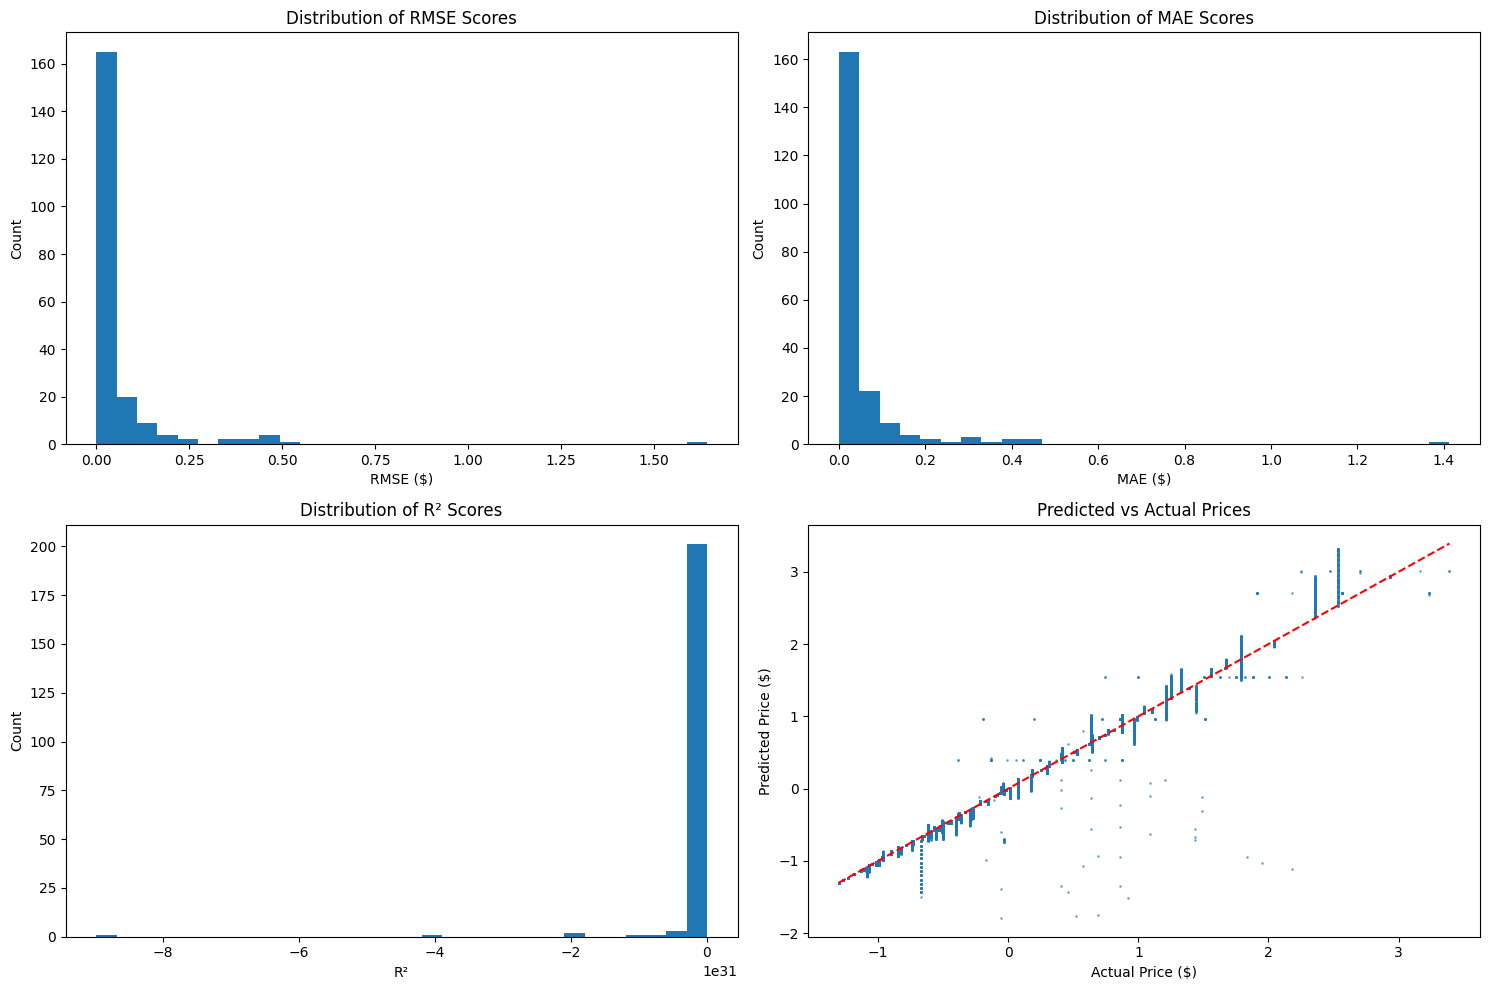


Detailed Statistics:
--------------------------------------------------
Number of listings analyzed: 210

RMSE Statistics:
count    2.100000e+02
mean     5.411291e-02
std      1.443829e-01
min      0.000000e+00
25%      1.224756e-07
50%      1.460595e-02
75%      4.921966e-02
max      1.642386e+00
dtype: float64

MAE Statistics:
count    2.100000e+02
mean     4.614301e-02
std      1.228299e-01
min      0.000000e+00
25%      1.064971e-07
50%      1.245375e-02
75%      4.245442e-02
max      1.412891e+00
dtype: float64

R² Statistics:
count    2.100000e+02
mean    -1.021476e+30
std      7.077284e+30
min     -8.979410e+31
25%     -3.114994e+28
50%     -1.012854e+14
75%      0.000000e+00
max      1.000000e+00
dtype: float64


In [77]:
def visualize_results(metrics, detailed_results):
    """
    Visualize the model performance results
    """
    # 1. Print Overall Performance Metrics
    print("\nOverall Model Performance:")
    print("-" * 50)
    print(f"Average RMSE: ${metrics['avg_rmse']:.2f}")
    print(f"Average MAE: ${metrics['avg_mae']:.2f}")
    print(f"Average R²: {metrics['avg_r2']:.4f}")
    print(f"Overall R²: {metrics['overall_r2']:.4f}")

    # 2. Create Visualization Plots
    plt.figure(figsize=(15, 10))
    
    # 2.1 RMSE Distribution
    plt.subplot(221)
    plt.hist(detailed_results['rmse_scores'], bins=30)
    plt.title('Distribution of RMSE Scores')
    plt.xlabel('RMSE ($)')
    plt.ylabel('Count')
    
    # 2.2 MAE Distribution
    plt.subplot(222)
    plt.hist(detailed_results['mae_scores'], bins=30)
    plt.title('Distribution of MAE Scores')
    plt.xlabel('MAE ($)')
    plt.ylabel('Count')
    
    # 2.3 R² Distribution
    plt.subplot(223)
    plt.hist(detailed_results['r2_scores'], bins=30)
    plt.title('Distribution of R² Scores')
    plt.xlabel('R²')
    plt.ylabel('Count')
    
    # 2.4 Predicted vs Actual
    plt.subplot(224)
    plt.scatter(detailed_results['actuals'], 
               detailed_results['predictions'], 
               alpha=0.5, 
               s=1)
    plt.plot([min(detailed_results['actuals']), 
              max(detailed_results['actuals'])],
             [min(detailed_results['actuals']), 
              max(detailed_results['actuals'])], 
             'r--')
    plt.title('Predicted vs Actual Prices')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    
    plt.tight_layout()
    plt.show()

    # 3. Additional Statistics
    print("\nDetailed Statistics:")
    print("-" * 50)
    print(f"Number of listings analyzed: {len(detailed_results['rmse_scores'])}")
    print("\nRMSE Statistics:")
    print(pd.Series(detailed_results['rmse_scores']).describe())
    print("\nMAE Statistics:")
    print(pd.Series(detailed_results['mae_scores']).describe())
    print("\nR² Statistics:")
    print(pd.Series(detailed_results['r2_scores']).describe())

# Use it after running your analysis:
metrics, detailed_results = evaluate_model_performance(baseline_data)
visualize_results(metrics, detailed_results)